In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_NMF = pd.read_csv("exports/export_NMF.csv", index_col=["Unnamed: 0"])
df_NMF["tags"] = df_NMF["tags"].apply(lambda x: x[1:-1].split(','))
df_NMF["tag_count"] = df_NMF["tags"].apply(lambda x: len(x))

In [5]:
df_LDA = pd.read_csv("exports/export_LDA.csv", index_col=["Unnamed: 0"])
df_LDA["tags"] = df_LDA["tags"].apply(lambda x: x[1:-1].split(','))
df_LDA["tag_count"] = df_LDA["tags"].apply(lambda x: len(x))

In [3]:
def show_distribution(dataframe):
    counts, bins = np.histogram(dataframe["tag_count"], bins=dataframe["tag_count"].max())
    x1 = dataframe["tag_count"][(dataframe["tag_count"] <= 3) & (dataframe["tag_count"] >= 0)]
    x2 = dataframe["tag_count"][(dataframe["tag_count"] > 3) & (dataframe["tag_count"] <= 20)]
    x3 = dataframe["tag_count"][(dataframe["tag_count"] > 20)]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.hist(x1, label=len(x1), bins=bins, color="#C72222")
    ax.hist(x2, label=len(x2), bins=bins, color="#B3DEEE")
    ax.hist(x3, label=len(x3), bins=bins, color="#F9A811")
    ax.set_xlim([0, 25])
    ax.set(xlabel="Number of Tags", ylabel="Number of documents", title="Distribution of Simple Tags Attached to Documents")
    ax.legend()
    sns.despine()

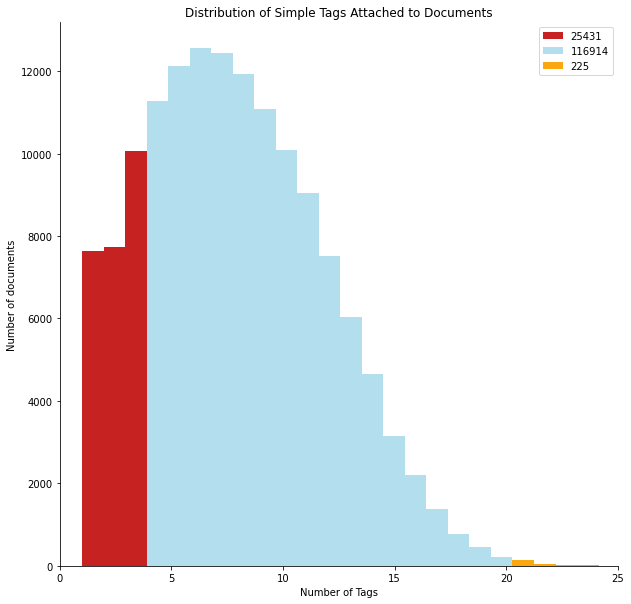

In [7]:
show_distribution(df_NMF)

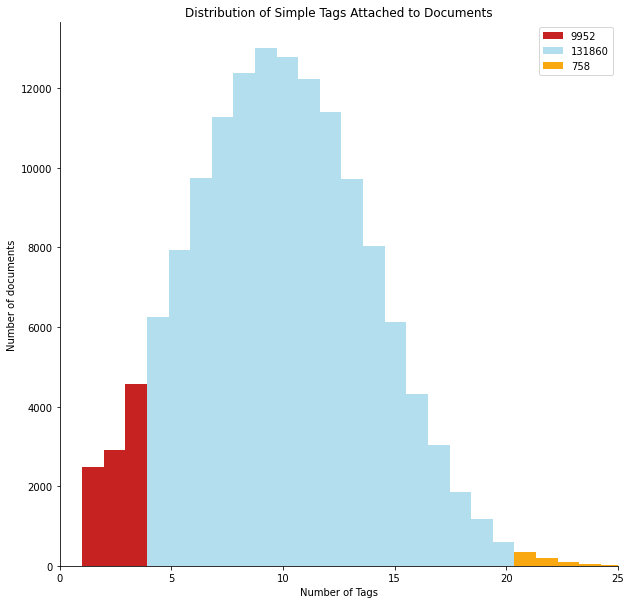

In [8]:
show_distribution(df_LDA)